[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/seap-udea/multimin/blob/master/docs/paper/paper-codes.ipynb)

<p align="left"><img src="https://raw.githubusercontent.com/seap-udea/multimin/master/docs/multimin-logo-white.webp" width="600" /></p>

# Paper codes (JOSS manuscript)

This notebook collects and executes the code snippets that appear in `docs/paper/paper.md`.

- **figprefix**: `paper`
- **figures**: saved under `gallery/`


## Installation and importing

If you're running this in Google Colab or need to install the package, uncomment and run the following cell:

In [3]:
try:
    from google.colab import drive  # noqa: F401
    %pip install -Uq multimin
except ImportError:
    print("Not running in Colab, skipping installation")
    %load_ext autoreload
    %autoreload 2

!mkdir -p gallery/

# Uncomment to install from GitHub (development version)
# !pip install git+https://github.com/seap-udea/MultiMin.git

figprefix = "paper"

Not running in Colab, skipping installation


In [15]:
import warnings

import matplotlib.pyplot as plt
import multimin as mn
import numpy as np

from IPython.display import Markdown, display

warnings.filterwarnings("ignore")

deg = np.pi / 180

## Multivariate MoG fit and visualization (from the manuscript)

MixtureOfGaussians.rvs executed in 0.43695616722106934 seconds
Loading a FitMoG object.
Number of gaussians: 2
Number of variables: 3
Number of dimensions: 6
Number of samples: 5000
Log-likelihood per point (-log L/N): 11.382387380908426
Iterations:
Iter 0:
	Vars: [0, 0, 2.2, 1.8, -2.3, 0.95, -0.7, 1.6, -1.6, -1.4, -0.082, -2.2, -2.7, -0.71, 0.99, 0.5, -0.15, 1.3, 0.77, 0.26]
	LogL/N: 5.702975752643309
Iter 1:
	Vars: [-1.1, 0.008, 1, 1.1, -0.89, 0.98, -0.47, 0.36, -1.8, -1.4, -1.4, -2.2, -3.5, -0.65, -0.33, 0.039, -1.3, 1.1, 0.2, 0.026]
	LogL/N: 5.027930729181173
Iter 2:
	Vars: [-0.46, 0.0093, 0.9, 0.79, -0.65, 1, -0.47, 0.59, -2.2, -1.7, -1.3, -2.4, -3.6, -0.71, -0.32, 0.18, -1.2, 1.2, 0.016, -0.029]
	LogL/N: 4.9244515691859165
Iter 3:
	Vars: [-0.2, 0.0096, 0.93, 0.6, -0.52, 1, -0.48, 0.61, -2.2, -1.7, -1.3, -2.4, -3.7, -0.7, -0.39, 0.23, -1.2, 1.2, -0.015, -0.037]
	LogL/N: 4.914791061413522
Iter 4:
	Vars: [-0.095, 0.0095, 0.95, 0.54, -0.48, 1, -0.48, 0.62, -2.2, -1.7, -1.3, -2.4, -3.

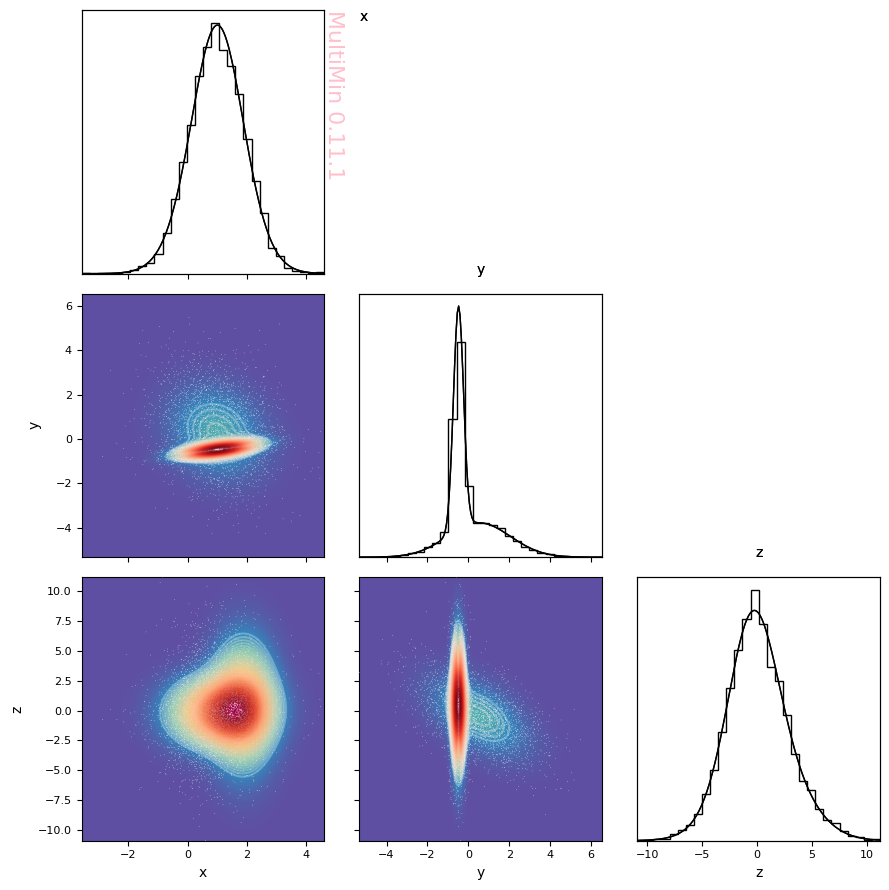

In [8]:
# Synthetic sample from a 3D, 2-component MoG
weights = [0.5, 0.5]
mus = [[1.0, 0.5, -0.5], [1.0, -0.5, +0.5]]
sigmas = [[1, 1.2, 2.3], [0.8, 0.2, 3.3]]
angles = [[10 * deg, 30 * deg, 20 * deg], [-20 * deg, 0.0, 30 * deg]]
Sigmas = mn.Stats.calc_covariance_from_rotation(sigmas, angles)

mog_true = mn.MixtureOfGaussians(mus=mus, weights=weights, Sigmas=Sigmas)

np.random.seed(1)
data = mog_true.rvs(5000)

# Fit and plot
F = mn.FitMoG(data=data, ngauss=2)
F.fit_data(progress="text")
G = F.plot_fit(properties=["x", "y", "z"], figsize=3)

# Save figure produced by MultiPlot
G.fig.savefig(f"gallery/{figprefix}_mog_fit_result_3d.png", dpi=200, bbox_inches="tight")
plt.close(G.fig)

## Multivariate fit-quality diagnostics (Q–Q / K–S)

ks_dist = 0.0132
r2_identity = 0.9986705435774915


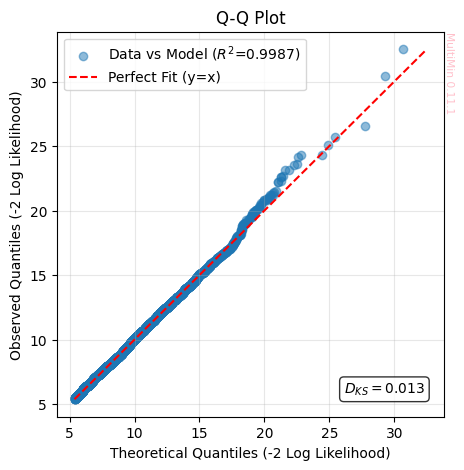

In [10]:
stats = F.quality_of_fit(data=data, n_sim=5000, plot_qq=True, figsize=5)
ks_dist = stats["ks_dist"]
r2_identity = stats["r2_identity"]

print("ks_dist =", ks_dist)
print("r2_identity =", r2_identity)

# Save Q–Q figure if it was created
if hasattr(F, "fig_qq") and F.fig_qq is not None:
    F.fig_qq.savefig(f"gallery/{figprefix}_mog_plot_qq.png", dpi=200, bbox_inches="tight")
    plt.close(F.fig_qq)

## Univariate spectral-line fitting (FitFunctionMoG)

Loading a FitFunctionMoG object.
Number of gaussians: 3
Number of variables: 1
Number of dimensions: 3
Number of grid points: 512
Domain: [[0.0, 511.0]]
    Iterations:
      Iter 0: loss = 31.4336
      Iter 1: loss = 31.4336
    Iterations:
      Iter 0: loss = 4.83301
      Iter 8: loss = 0.441622
    Iterations:
      Iter 0: loss = 4.49417
      Iter 4: loss = 4.48843
    Iterations:
      Iter 0: loss = 2.31729
      Iter 10: loss = nan
    Iterations:
      Iter 0: loss = 0.492582
      Iter 10: loss = 0.0896266
      Iter 14: loss = 0.0874578
      Iterations:
        Iter 0: loss = 0.0902769
        Iter 9: loss = 0.0874404
FitFunctionMoG.fit_data executed in 2.709959030151367 seconds
Quality of fit (after fit_data):
  R²    = 0.99653  (1 = perfect, 0 = no better than mean)
R2 = 0.9965296447120996


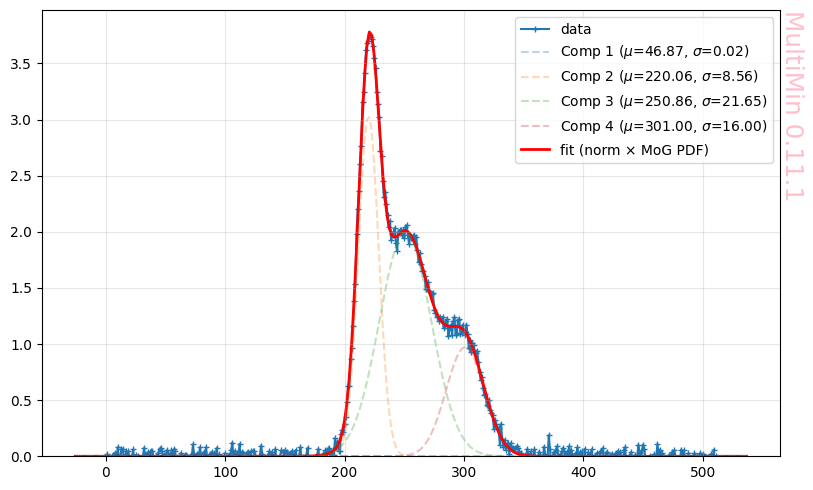

In [12]:
path = mn.Util.get_data("complex-line.txt")
chan, spectrum = np.loadtxt(path, unpack=True, comments="#")

Ff = mn.FitFunctionMoG(data=(chan, spectrum), ngauss=3)
Ff.fit_data(mode="adaptive", advance=10)
fig = Ff.plot_fit(dargs=dict())
stats_f = Ff.quality_of_fit()

print("R2 =", stats_f.get("R2"))

fig.savefig(
    f"gallery/{figprefix}_functions_adaptive_fit_complex_line.png",
    dpi=200,
    bbox_inches="tight",
)
plt.close(fig)

## Exporting LaTeX and generating accelerated callables (`cmog=True`)

In [16]:
latex_str, _ = F.mog.get_function(type="latex", print_code=False, decimals=4)
display(Markdown(latex_str))

$$f(\mathbf{x}) = w_1 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_1, \mathbf{\Sigma}_1) + w_2 \, \mathcal{N}(\mathbf{x}; \boldsymbol{\mu}_2, \mathbf{\Sigma}_2)$$

where

$$w_1 = 0.4909$$
$$\boldsymbol{\mu}_1 = \left( \begin{array}{c} 0.9577 \\ 0.5176 \\ -0.4634 \end{array}\right)$$
$$\mathbf{\Sigma}_1 = \left( \begin{array}{ccc} 1.0805 & -0.3353 & 0.2666 \\ -0.3353 & 2.3655 & -1.716 \\ 0.2666 & -1.716 & 4.4798 \end{array}\right)$$

$$w_2 = 0.5091$$
$$\boldsymbol{\mu}_2 = \left( \begin{array}{c} 1.0192 \\ -0.481 \\ 0.6188 \end{array}\right)$$
$$\mathbf{\Sigma}_2 = \left( \begin{array}{ccc} 0.6319 & 0.1054 & -0.0236 \\ 0.1054 & 0.0604 & -0.0145 \\ -0.0236 & -0.0145 & 11.0725 \end{array}\right)$$

Here the normal distribution is defined as:

$$\mathcal{N}(\mathbf{x}; \boldsymbol{\mu}, \mathbf{\Sigma}) = \frac{1}{\sqrt{(2\pi)^{{k}} \det \mathbf{\Sigma}}} \exp\left[-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu})^{\top} \mathbf{\Sigma}^{{-1}} (\mathbf{x}-\boldsymbol{\mu})\right]$$

In [18]:
# LaTeX formula with explicit parameters (suitable for manuscripts)
latex_str, _ = F.mog.get_function(type="latex", print_code=False, decimals=4)
print(latex_str.splitlines()[0])
print("...")

# Python callable; if available, generate code that uses cmog.*_c ctypes wrappers
code_str, f_fast = F.mog.get_function(type="python", cmog=False, print_code=False)

try:
    code_str_c, f_fast_c = F.mog.get_function(type="python", cmog=True, print_code=False)
    has_cmog = True
except Exception as exc:
    has_cmog = False
    print("cmog=True not available in this environment:", exc)

# Minimal functional checks
x0 = [0.2, 0.3, 0.5]
print("python mog(x0) =", f_fast(x0))
if has_cmog:
    print("cmog mog(x0) =", f_fast_c(x0))

# Optional: quick micro-benchmark (skipped if cmog is unavailable)
X = np.random.normal(size=(10000, 3))
%timeit f_fast(x0)
%timeit f_fast(X)
if has_cmog:
    %timeit f_fast_c(x0)
    %timeit f_fast_c(X)


python mog(x0) = 0.007317190316853451
cmog mog(x0) = [0.00731719]
Python function:
66.9 μs ± 9.38 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
584 μs ± 48.8 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
C-batch function:
12.1 μs ± 240 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
311 μs ± 25.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---

**MultiMin** - Multivariate Gaussian fitting

© 2026 Jorge I. Zuluaga